# Electromagnetic theory - Semester Assignment - Problem set 2

By: Ingve Aleksander Hetland

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, arcsin, arccos,deg2rad, rad2deg
from numpy.linalg import inv, norm, det
from mpl_toolkits.mplot3d import axes3d

In [2]:
mu0 = 4*pi*10**(-7)              # Magnetic permeability of free space
mom0 = 1.93e19                   # Magnetic dipole moment factor [J/T]
R0 = 6.37e6                      # Radius earth [m]
B0 = 7.34e-9                     # Magnetic field factor [T]
q = 1.60e-19                     # Elementary charge [C]
m_p = 1.67e-27                   # Proton mass [kg]
t0 = 14.2                        # Characteristic time [s]
v0 = 4.47e4                      # Characteristic speed [m/s]

print(1.05e23/mom0)

5440.414507772021


In [134]:
# Euler angles
alpha = deg2rad(0)
beta = deg2rad(11)
gamma = deg2rad(0)

# Construct rotation matrix
def RotationMatrix(alpha, beta, gamma):
    """
    INPUT
    alpha:  float,   angle of first rotation
    beta:   float,   angle of second rotation
    gamma:  float,   angle of third rotation
    ------------
    Constructs and returns a zxz 3D rotation matrix with rotation angles alpha, beta and gamma
    """
    c1 = cos(alpha)
    c2 = cos(beta)
    c3 = cos(gamma)
    s1 = sin(alpha)
    s2 = sin(beta)
    s3 = sin(gamma)
    return np.array([[c1*c3-c2*s1*s3, -c1*s3-c2*c3*s1, s1*s2],
                     [c3*s1+c1*c2*s3, c1*c2*c3-s1*s3, -c1*s2],
                     [s2*s3, c3*s2, c2]])

In [135]:

def B_dip_grid(r, m):
    """
    INPUT
    r:    3D array,   Array with dimensionless coordinate grids
    m:    1D array,   Dimensionless magnetic dipole moment
    ---
    Calculates and returns the dimensionless dipole magnetic field of a dipole at the origin with dimensionless magnetic dipole moment
    m and at positions given by r
    ---
    OUTPUT
    B:   3D array,   Array with dimensionsless magnetic dipole field
    """
    # Calculate distances to each point and set zeros to a very small value
    R = norm(r, axis=0)
    R = np.where(R == 0, -1e-20, R)
    
    # Calculate multiplications and divisions
    mDotr = np.tensordot(m, r, axes=1)
    mDivR3 = np.tensordot(m, 1/R**3, axes=0)
    
    # Calculate relative magnetic field
    B = 3*mDotr*r/R**5 - mDivR3
    return B

def B_dip(r, m):
    """
    INPUT
    r:    2D array,   Array with dimensionless coordinate grids
    m:    1D array,   Dimensionless magnetic dipole moment
    ---
    Calculates and returns the dimensionless dipole magnetic field of a dipole at the origin with dimensionless magnetic dipole moment
    m and at positions given by r
    ---
    OUTPUT
    B:   2D array,   Array with dimensionsless magnetic dipole field
    """
    # Calculate distances to each point and set zeros to a very small value
    R = norm(r, axis=0)
    R = np.where(R == 0, 1e-30, R)
    
    # Calculate dot product
    mDotr = np.dot(m, r)
    
    # Calculate dimensionless magnetic field
    B = 3*mDotr*r/R**5 - m/R**3
    return B

In [136]:
# Define rotation matrix and its inverse
R = RotationMatrix(alpha, beta, gamma)
RInv = inv(R)

# Define magnetic dipole moment along z and rotate vector
momMark = np.array([0, 0, -1.05e23])/mom0
mom = R@momMark.T
momNorm = mom/norm(mom)

def grids(N):
    # Define axes and meshgrids
    x, dx = np.linspace(-5, 5, N, retstep=True)
    y, dy = np.linspace(-5, 5, N, retstep=True)
    z, dz = np.linspace(-5, 5, N, retstep=True)
    xGrid, yGrid, zGrid = np.meshgrid(x, y, z)
    grid = np.array([xGrid, yGrid, zGrid])
    return grid

grid3d = grids(7)
smallGrid = grids(21)
bigGrid = grids(501)

In [137]:
# Calculate magnetic field, its strength and the normalized magnetic field
B = B_dip_grid(grid3d, mom)
BAbs = norm(B, axis=0)
BNorm = B/BAbs

B2Small = B_dip_grid(smallGrid, mom)
B2AbsSmall = norm(B2Small, axis=0)
B2NormSmall = B2Small/B2AbsSmall

B2Big = B_dip_grid(bigGrid, mom)
B2AbsBig = norm(B2Big, axis=0)
B2NormBig = B2Big/B2AbsBig

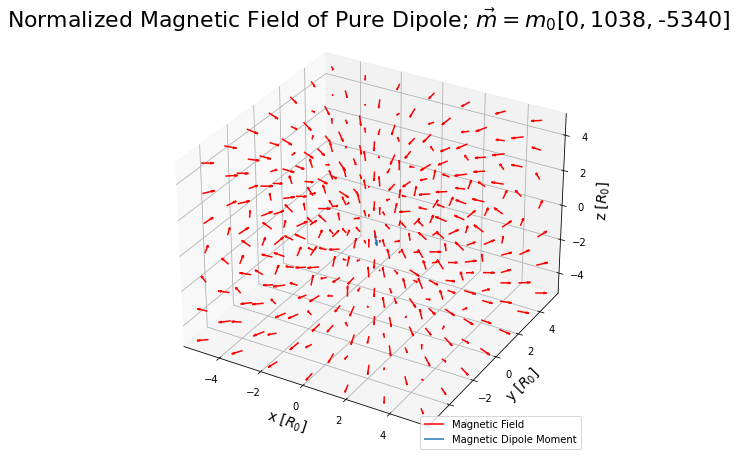

Text(0.5, 1.0, 'Strength of Field; $yz$-plane')

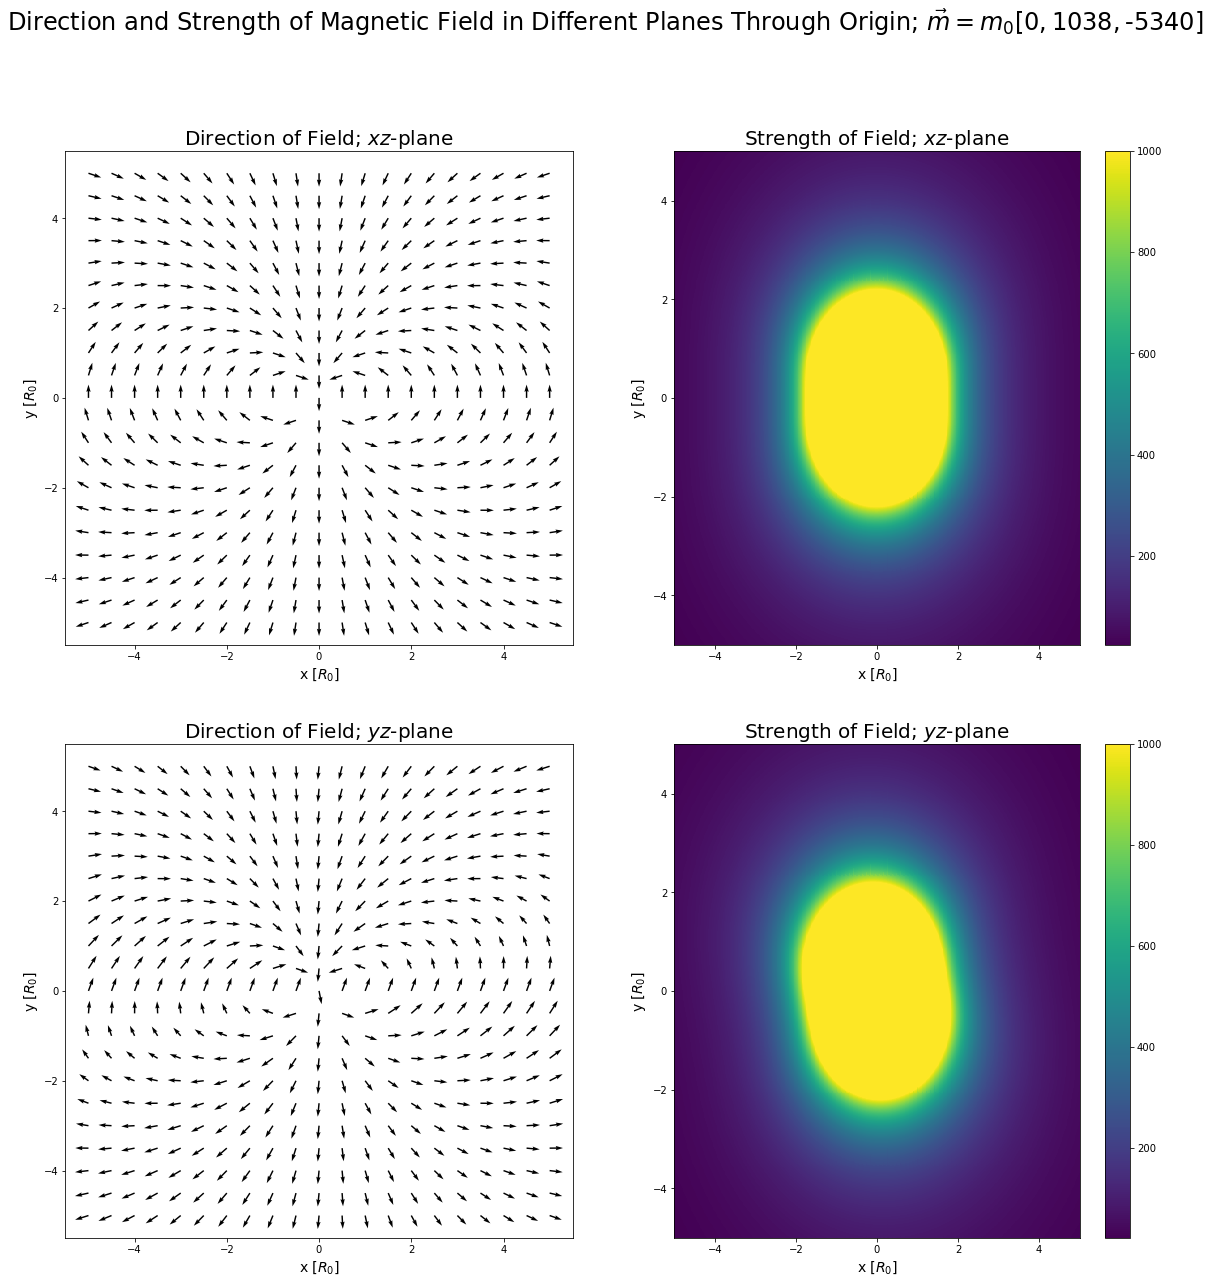

In [138]:
# 3D plot of normalized magnetic field of dipole
fig1 = plt.figure(0, figsize=(15,8))
axes = fig1.gca(projection="3d")
axes.quiver(grid3d[0], grid3d[1], grid3d[2], BNorm[0], BNorm[1], BNorm[2], length=.5, color="r", label="Magnetic Field")
axes.quiver(0,0,0, momNorm[0], momNorm[1], momNorm[2], length=1, label="Magnetic Dipole Moment")
axes.set_xlabel(r"x [$R_0$]", fontsize=14)
axes.set_ylabel(r"y [$R_0$]", fontsize=14)
axes.set_zlabel(r"z [$R_0$]", fontsize=14)
axes.set_title(fr"Normalized Magnetic Field of Pure Dipole; $\vec{{m}}={{m_0}}[${mom[0]:.0f}$,${mom[1]:.0f}$,${mom[2]:.0f}$]$", fontsize=22, y=1.05)
axes.legend(loc=4)
plt.show()

# Plot xz and yz planes
fig2, axs2 = plt.subplots(2,2,figsize=(20,20))
fig2.suptitle(fr"Direction and Strength of Magnetic Field in Different Planes Through Origin; $\vec{{m}}={{m_0}}[${mom[0]:.0f}$,${mom[1]:.0f}$,${mom[2]:.0f}$]$", fontsize=24, y=.98)

axs2[0,0].quiver(smallGrid[0, 0, :], smallGrid[2, :, 0], B2NormSmall[0, 10], B2NormSmall[2, 10])
imxz = axs2[0,1].pcolormesh(bigGrid[0, 0, :], bigGrid[2, :, 0], B2AbsBig[250], shading="auto", vmax=1000)
fig2.colorbar(imxz, ax=axs2[0,1])
axs2[0, 0].set_xlabel(r"x [$R_0$]", fontsize=14)
axs2[0, 0].set_ylabel(r"y [$R_0$]", fontsize=14)
axs2[0, 1].set_xlabel(r"x [$R_0$]", fontsize=14)
axs2[0, 1].set_ylabel(r"y [$R_0$]", fontsize=14)
axs2[0, 0].set_title(r"Direction of Field; $xz$-plane", fontsize=20)
axs2[0, 1].set_title(r"Strength of Field; $xz$-plane", fontsize=20)

axs2[1,0].quiver(smallGrid[1, :, 0], smallGrid[2, :, 0], B2NormSmall[1, :, 10], B2NormSmall[2, 10])
imyz = axs2[1,1].pcolormesh(bigGrid[1, :, 0], bigGrid[2, :, 0], B2AbsBig[:, 250], shading="auto", vmax=1000)
fig2.colorbar(imyz, ax=axs2[1,1])
axs2[1, 0].set_xlabel(r"x [$R_0$]", fontsize=14)
axs2[1, 0].set_ylabel(r"y [$R_0$]", fontsize=14)
axs2[1, 1].set_xlabel(r"x [$R_0$]", fontsize=14)
axs2[1, 1].set_ylabel(r"y [$R_0$]", fontsize=14)
axs2[1, 0].set_title(r"Direction of Field; $yz$-plane", fontsize=20)
axs2[1, 1].set_title(r"Strength of Field; $yz$-plane", fontsize=20)


In [139]:
def RK4(f, t, w, h):
    """
    INPUT:
        f:         funksjon,     Vektor for ligningssystem på form: w'(t) = f(t, w)
        t:         float,        Foreløpig tidspunkt i utregning
        w:         1D array,     Vektor med verdier for funksjoner som inngår i ligningssystem ved tid t; w'(t) = f(t, w)
        h:         float,        Steglengde
    ---
    Utfører ett steg av den klassiske Runge-Kutta 4 metoden for løsning av ODL.
    ---
    OUTPUT:
        t_next:    float,        Neste tidspunkt i utregning
        w_next:    1D array,     Nye verdier for funksjoner i w
    """
    k1 = f(t, w)
    k2 = f(t + h/2, w + h*k1/2)
    k3 = f(t + h/2, w + h*k2/2)
    k4 = f(t + h, w + h*k3)

    t_next = t + h
    w_next = w + h*(k1/6 + k2/3 + k3/3 + k4/6)
    return t_next, w_next

def odeSolver(f, w0, T, h, method=RK4):
    """
    INPUT
    f:        function,   Function with expressions for the derivatives of quantities we are solving for in our ODEs
    t:        float,      Current time in calculation
    w:        1D array,   Array of values we are calculating the evolution of
    h:        float,      Time-steps
    method:   function,   Method of solving ODEs. Using RK4 here
    ---
    Solves a given set of ODEs given initial conditions over a time T
    ---
    t:        1D array,   Array of times
    r:        2D array,   Array of resulting positions
    v:        2D array,   Array of resulting velocities
    """
    # Find number of time steps and construct time array
    N = int(T//h)
    t = np.linspace(0, T, N)
    
    # Construct and initialize array with quantities of interest
    w = np.zeros((N+1, 6))
    w[0] = w0
    
    # Iterate our method to solve the set of ODEs and save results
    for i, time in enumerate(t):
        tnext, wnext = method(f, time, w[i], h)
        
        w[i+1] = wnext
    
    # Save results in seperate arrays
    r = w[:, :3]
    v = w[:, 3:]
    return t, r, v

In [140]:
def w(r, v):
    """
    INPUT
    r:   1D array,   Array with current position of particle
    v:   1D array,   Array with current velocity of particle
    ---
    Constructs and returns array with positions and velocities
    """
    return np.array([r[0],
                     r[1],
                     r[2],
                     v[0],
                     v[1],
                     v[2]])

def f(t, w):
    """
    INPUT
    t:    float,     Current time in calculation
    w:    1D array,  Array of positions and velocities at given time
    ---
    Calculates and returns values of the derivative of each element in w for the next step
    """
    # Define variables
    x, y, z, vx, vy, vz = w
    r = np.array([x, y, z])
    v = np.array([vx, vy, vz])
    
    # Calculate magnetic field
    B = B_dip(r, mom)
    
    # Calculate dimensionless acceleration from the Lorentz force and Newton's law
    a = np.cross(v, B)
    return np.array([vx,
                     vy,
                     vz,
                     a[0],
                     a[1],
                     a[2]])

In [157]:
# Set initial conditions
r0 = np.array([-6, 0, 1])
v0 = np.array([10, 0, 0])
T = 20
w0 = w(r0, v0)
h = 0.001

# Solve for trajectory of particle
t, r, v = odeSolver(f, w0, T, h)

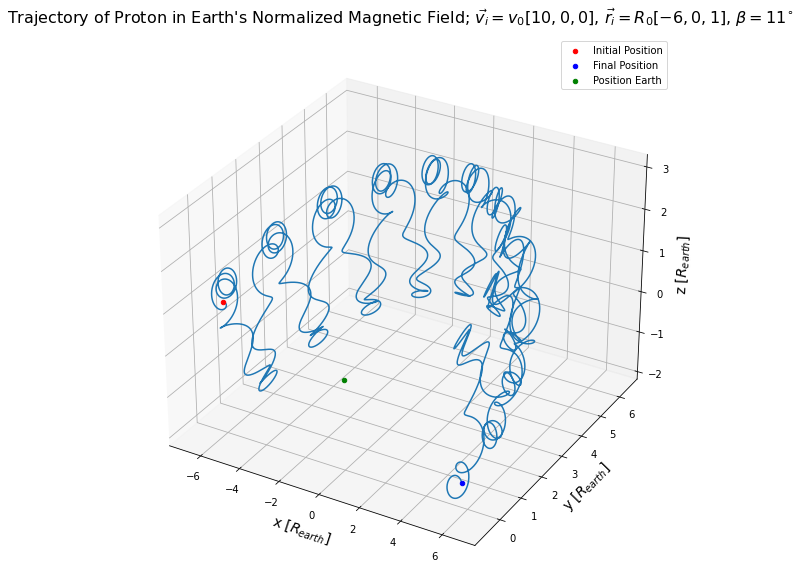

In [163]:
# Plot trajectory in 3D
ax = plt.figure(figsize=(15,10)).add_subplot(projection="3d")
ax.plot(r[:, 0], r[:, 1], r[:, 2])
#ax.quiver(grid3d[0], grid3d[1], grid3d[2], BNorm[0], BNorm[1], BNorm[2], length=.5, color="m")
ax.scatter(r[0, 0], r[0, 1], r[0, 2], color="r", label="Initial Position")
ax.scatter(r[-1, 0], r[-1, 1], r[-1, 2], color="b", label="Final Position")
ax.scatter(0, 0, 0, color="g", label="Position Earth")
ax.set_xlabel(r"x [$R_{earth}$]", fontsize=14)
ax.set_ylabel(r"y [$R_{earth}$]", fontsize=14)
ax.set_zlabel(r"z [$R_{earth}$]", fontsize=14)
ax.set_title(fr"Trajectory of Proton in Earth's Normalized Magnetic Field; $\vec{{v_i}}={{v_0}}[{v0[0]:.0f},{v0[1]:.0f},{v0[2]:.0f}]$, $\vec{{r_i}}={{R_0}}[{r0[0]:.0f},{r0[1]:.0f},{r0[2]:.0f}]$, $\beta={rad2deg(beta):.0f}^{{\circ}}$", fontsize=16, y=1.1)
ax.legend(loc=1)

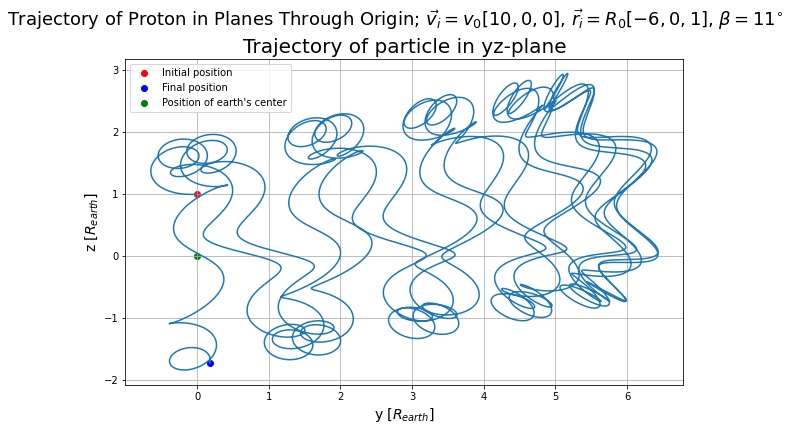

In [166]:
# Plot planes of trajectory
fig, axs = plt.subplots(1, 1, figsize=(10,6))

fig.suptitle(fr"Trajectory of Proton in Planes Through Origin; $\vec{{v_i}}={{v_0}}[{v0[0]:.0f},{v0[1]:.0f},{v0[2]:.0f}]$, $\vec{{r_i}}={{R_0}}[{r0[0]:.0f},{r0[1]:.0f},{r0[2]:.0f}]$, $\beta={rad2deg(beta):.0f}^{{\circ}}$", fontsize=18, y=1)

#axs[0].plot(r[:, 0], r[:, 1])
#axs[1].plot(r[:, 0], r[:, 2])
axs.plot(r[:, 1], r[:, 2])

#axs[0].scatter(r[0, 0], r[0, 1], color="r", label="Initial position")
#axs[0].scatter(r[-1, 0], r[-1, 1], color="b", label="Final position")
#axs[0].scatter(0, 0, color="g", label="Position of earth's center")
#axs[1].scatter(r[0, 0], r[0, 2], color="r", label="Initial position")
#axs[1].scatter(r[-1, 0], r[-1, 2], color="b", label="Final position")
#axs[1].scatter(0, 0, color="g", label="Position of earth's center")
axs.scatter(r[0, 1], r[0, 2], color="r", label="Initial position")
axs.scatter(r[-1, 1], r[-1, 2], color="b", label="Final position")
axs.scatter(0, 0, color="g", label="Position of earth's center")

#axs[0].set_xlabel(r"x [$R_{earth}$]", fontsize=14)
#axs[0].set_ylabel(r"y [$R_{earth}$]", fontsize=14)
#axs[1].set_xlabel(r"x [$R_{earth}$]", fontsize=14)
#axs[1].set_ylabel(r"z [$R_{earth}$]", fontsize=14)
axs.set_xlabel(r"y [$R_{earth}$]", fontsize=14)
axs.set_ylabel(r"z [$R_{earth}$]", fontsize=14)

#axs[0].set_title("Trajectory of particle in xy-plane", fontsize=20)
#axs[1].set_title("Trajectory of particle in xz-plane", fontsize=20)
axs.set_title("Trajectory of particle in yz-plane", fontsize=20)

#axs[0].grid()
#axs[1].grid()
axs.grid()
#axs[0].legend()
#axs[1].legend()
axs.legend()

0.0
1.5093852212544334e-07


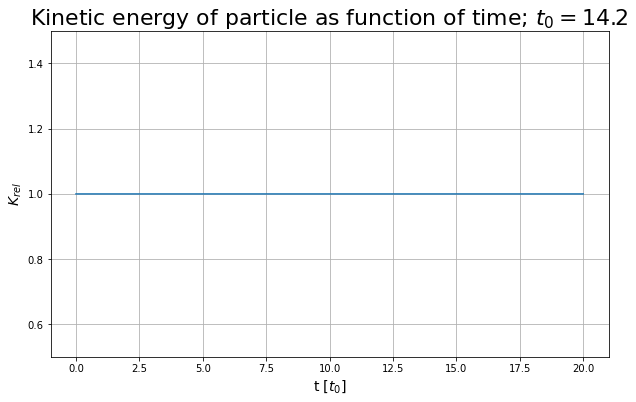

In [167]:
# Calculate relative kinetic energy at every time step
KRel = norm(v, axis=-1)**2/norm(v0)**2
Kmax = np.amax(KRel)
Kmin = np.amin(KRel)
print(KRel[0]-Kmax)
print(KRel[0]-Kmin)

# Plot kinetic energy as function of time
fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.plot(t, KRel[:-1])
ax3.set_ylim( 0.5, 1.5)
ax3.set_xlabel(r"t [$t_0$]", fontsize=14)
ax3.set_ylabel(r"$K_{rel}$", fontsize=14)
ax3.set_title(fr"Kinetic energy of particle as function of time; $t_0={t0}$", fontsize=22)
ax3.grid()

In [168]:
np.savetxt("protonTrajectory4.txt", (t, r[:-1, 0], r[:-1, 1], r[:-1, 2], v[:-1, 0], v[:-1, 1], v[:-1, 2]), delimiter=",")

In [111]:
t1, x1, y1, z1, vx1, vy1, vz1 = np.loadtxt("protonTrajectory1.txt", delimiter=",")

In [125]:
t2, x2, y2, z2, vx2, vy2, vz2 = np.loadtxt("protonTrajectory2.txt", delimiter=",")

In [146]:
t3, x3, y3, z3, vx3, vy3, vz3 = np.loadtxt("protonTrajectory3.txt", delimiter=",")

In [169]:
t4, x4, y4, z4, vx4, vy4, vz4 = np.loadtxt("protonTrajectory4.txt", delimiter=",")

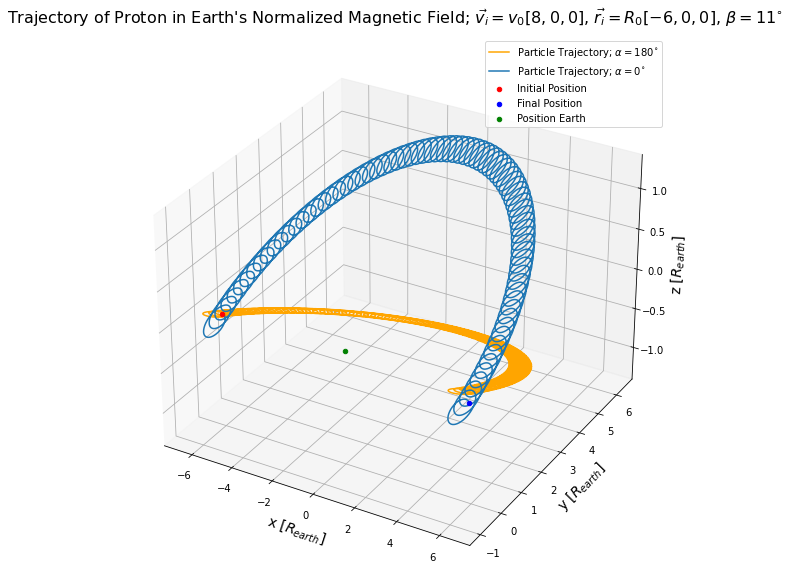

In [156]:
# Plot trajectory in 3D
ax = plt.figure(figsize=(15,10)).add_subplot(projection="3d")
ax.plot(x2, y2, z2, label=r"Particle Trajectory; $\alpha=180^{\circ}$", color="orange")
ax.plot(x1, y1, z1, label=r"Particle Trajectory; $\alpha=0^{\circ}$")
#ax.quiver(grid3d[0], grid3d[1], grid3d[2], BNorm[0], BNorm[1], BNorm[2], length=.5, color="m")
ax.scatter(x1[0], y1[0], z1[0], color="r", label="Initial Position")
ax.scatter(x1[-1], y1[-1], z1[-1], color="b", label="Final Position")
ax.scatter(0, 0, 0, color="g", label="Position Earth")
ax.set_xlabel(r"x [$R_{earth}$]", fontsize=14)
ax.set_ylabel(r"y [$R_{earth}$]", fontsize=14)
ax.set_zlabel(r"z [$R_{earth}$]", fontsize=14)
ax.set_title(fr"Trajectory of Proton in Earth's Normalized Magnetic Field; $\vec{{v_i}}={{v_0}}[{v0[0]:.0f},{v0[1]:.0f},{v0[2]:.0f}]$, $\vec{{r_i}}={{R_0}}[{r0[0]:.0f},{r0[1]:.0f},{r0[2]:.0f}]$, $\beta={rad2deg(beta):.0f}^{{\circ}}$", fontsize=16, y=1.1)
ax.legend(loc=1)